In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
base_dir = '/mnt/lts/nfs_fs02/sadow_lab/personal/yusukemh/PI-CASC'
FILENAME = '/mnt/lts/nfs_fs02/sadow_lab/personal/yusukemh/' \
    + 'PI-CASC/processed_data/ml_nonfilled_min_750_dataset.csv'

In [8]:
df_locations = pd.read_csv(f"{base_dir}/SKNlocations.csv")
lat_hawaii = [15, 17.5, 20, 22.5, 25]
lon_hawaii = [-162.5, -160, -157.5, -155, -152.5]
xx, yy = np.meshgrid(lon_hawaii, lat_hawaii)

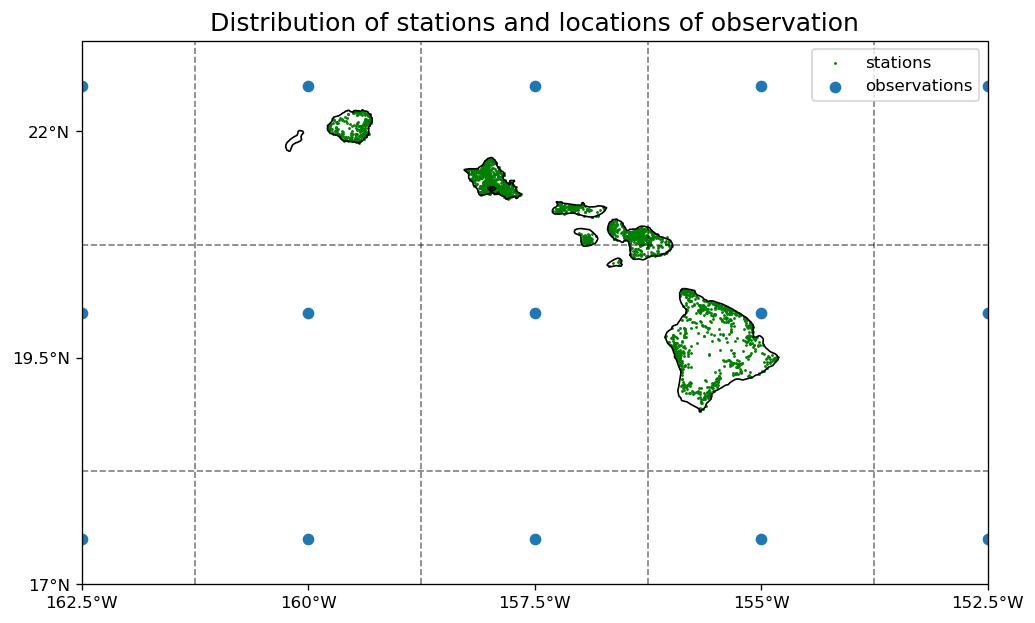

In [12]:
plt.figure(figsize=(10, 6), dpi=120)

ax = plt.axes(projection=ccrs.PlateCarree())

xmin, xmax = -162.5, -152.5
ymin, ymax = 17, 23

ax.set_xticks(np.arange(xmin, xmax+1, 2.5))
ax.set_yticks(np.arange(ymin, ymax+1, 2.5))

ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.grid(linewidth=2, color='black', linestyle='--')

stations = plt.scatter(df_locations["Lon_DD"], df_locations["Lat_DD"], s=0.5, marker='o', color="green", label="stations")
observations = plt.scatter(xx, yy, label="observations")
plt.vlines(x=np.arange(xmin, xmax+1, 2.5) - 1.25, ymin=ymin, ymax=ymax, color="k", linewidth=1, linestyle="--", alpha=0.5)
plt.hlines(y=np.arange(ymin, ymax+1, 2.5) - 1.25 , xmin=xmin, xmax=xmax, color="k", linewidth=1, linestyle="--", alpha=0.5)
plt.title("Distribution of stations and locations of observation", fontsize=(15))
plt.legend()
ax.coastlines(resolution='10m')
print()
# plt.savefig(f"{BASE_DIR}/images/reanalysis_grids.png")

In [15]:
df_data = pd.read_csv(FILENAME)

In [25]:
df_train = df_data[df_data['fold'] != 4]
df_test = df_data[df_data['fold'] == 4]

In [36]:
df_train[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month'])

,year,month
0,1948,1
1423,1948,2
2846,1948,3
4277,1948,4
5707,1948,5
...,...,...
14919,1999,7
8382,1999,8
9804,1999,9
11226,1999,10


In [37]:
df_test[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month'])

,year,month
18008,1999,12
1231,2000,1
2658,2000,2
4086,2000,3
5515,2000,4
...,...,...
15345,2012,8
15460,2012,9
18359,2012,10
16877,2012,11


In [40]:
df_train.query('year == 1999 & month == 1')

,skn,year,month,data_in,filled,name,lat,lon,air2m,air1000_500,...,slp_2,slp_3,slp_4,slp_5,elevation,season_wet,n_data,len,cumsum,fold
1208,54.0,1999,1,12.42,False,HAWAII NAT PK HQ,19.429741,-155.257146,295.40090,31.679993,...,1016.992126,1017.618225,1017.603149,1017.685791,3970.0,1,778,23,14529,3
1209,79.0,1999,1,12.10,False,KULANI CAMP,19.548635,-155.300557,295.40090,31.679993,...,1016.992126,1017.618225,1017.603149,1017.685791,5170.0,1,758,23,14529,3
1210,87.0,1999,1,16.68,False,Hilo Airport,19.722200,-155.055800,295.40090,31.679993,...,1016.992126,1017.618225,1017.603149,1017.685791,27.0,1,768,23,14529,3
1211,338.0,1999,1,8.31,False,HALEAKALA RANGER,20.758467,-156.245523,295.40090,31.679993,...,1016.992126,1017.618225,1017.603149,1017.685791,7030.0,1,778,23,14529,3
1212,250.0,1999,1,3.39,False,ULUPALAKUA RANCH,20.648174,-156.398497,295.74258,31.730003,...,1016.992126,1017.618225,1017.603149,1017.685791,1900.0,1,775,23,14529,3
1213,267.0,1999,1,2.11,False,KULA SANATORIUM,20.700140,-156.355519,295.74258,31.730003,...,1016.992126,1017.618225,1017.603149,1017.685791,3005.0,1,772,23,14529,3
1214,296.1,1999,1,3.59,False,OLOWALU,20.811799,-156.618842,295.74258,31.730003,...,1016.992126,1017.618225,1017.603149,1017.685791,25.0,1,763,23,14529,3
1215,311.0,1999,1,4.06,False,KIHEI,20.785133,-156.450514,295.74258,31.730003,...,1016.992126,1017.618225,1017.603149,1017.685791,85.0,1,778,23,14529,3
1216,396.0,1999,1,2.70,False,PUUNENE,20.871793,-156.453847,295.74258,31.730003,...,1016.992126,1017.618225,1017.603149,1017.685791,60.0,1,778,23,14529,3
1217,400.0,1999,1,3.97,False,SPRECKELSVILLE,20.897526,-156.414270,295.74258,31.730003,...,1016.992126,1017.618225,1017.603149,1017.685791,65.0,1,777,23,14529,3
